<a href="https://colab.research.google.com/github/Raju-chinthakula/Case-study/blob/main/Copy_of_Case_Study_ml100k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the datesets

In [ ]:
df_data = pd.read_csv("/content/u_data.csv", sep='\t', header=None, names = ['user_id','item_id','rating', 'timestamp'])
#user id | item id | rating | timestamp
df_data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
df_user = pd.read_csv("/content/u_user.csv", sep='|', header=None, names=['user_id','age','gender','occupation','zip_code'])
#user id | age | gender | occupation | zip code
df_user

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
df_item = pd.read_csv("/content/u_item.csv", sep='|', header=None,  encoding='iso-8859-1', names = ['movie_id','movie_title', 'release_date','video_release_date','IMDb_URL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror ','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
df_item

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_item.drop(['video_release_date','IMDb_URL'], axis=1, inplace = True)
df_item

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_item['release_date'] = pd.to_datetime(df_item['release_date'], dayfirst=True)
df_item

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),1998-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),1994-01-01,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_data.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [ ]:
df_data.dtypes

user_id      int64
item_id      int64
rating       int64
timestamp    int64
dtype: object

In [ ]:
df_data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [ ]:
df_item.isna().sum().sum()

1

In [ ]:
df_item.dtypes

movie_id                 int64
movie_title             object
release_date    datetime64[ns]
unknown                  int64
Action                   int64
Adventure                int64
Animation                int64
Childrens                int64
Comedy                   int64
Crime                    int64
Documentary              int64
Drama                    int64
Fantasy                  int64
Film_Noir                int64
Horror                   int64
Musical                  int64
Mystery                  int64
Romance                  int64
Sci-Fi                   int64
Thriller                 int64
War                      int64
Western                  int64
dtype: object

In [ ]:
df_user.isna().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [ ]:
df_user.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

#Check for Duplicates (We Missed This)

In [ ]:
df_data.duplicated().sum()

0

In [ ]:
df_item.duplicated().sum()

0

In [ ]:
df_user.duplicated().sum()

0

All seems well and fine now. But it actually is not. There are duplicate values that missed to check for.<br>
For eg. two different movie_id(s) are assigned to the same movie. One such example is given below.

In [ ]:
df_item[df_item['movie_id']==246]

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
245,246,Chasing Amy (1997),1997-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_item[df_item['movie_id']==268]

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
267,268,Chasing Amy (1997),1997-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Checking for duplicated again after settting the index to movie_id
df_item.set_index("movie_id").duplicated().sum()

18

In [ ]:
#removing the duplicates
dup_bool_mask = df_item.set_index("movie_id").duplicated()
df_item = df_item.set_index("movie_id")
df_item = df_item[~dup_bool_mask]
df_item = df_item.reset_index()
df_item

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,1677,Sweet Nothing (1995),1996-09-20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1660,1678,Mat' i syn (1997),1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1661,1679,B. Monkey (1998),1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1662,1681,You So Crazy (1994),1994-01-01,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0




#Data Visulaization (Univariate)

rating - df_data <br>
'age' - df_user <br>
'release date' - df_item <br >
'gender' - df_user <br>
'occupation' - df_user <br>

In [ ]:
df_data.rating.unique()

array([3, 1, 2, 4, 5])

In [ ]:
df_data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


<Axes: xlabel='rating', ylabel='count'>

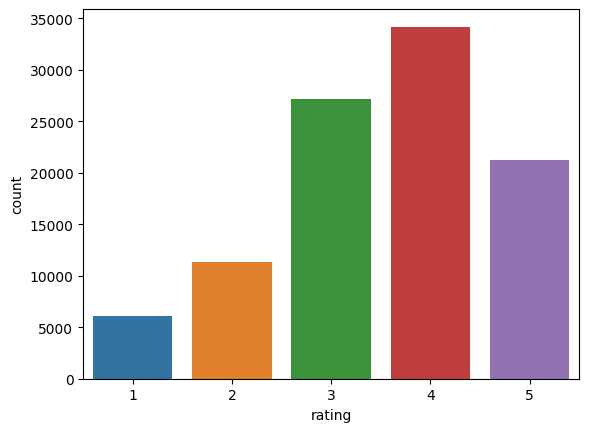

In [ ]:
sns.countplot(data=df_data, x='rating')

In [ ]:
df_user.age.unique()

array([24, 53, 23, 33, 42, 57, 36, 29, 39, 28, 47, 45, 49, 21, 30, 35, 40,
       26, 25, 32, 41,  7, 38, 20, 19, 27, 18, 22, 37, 16, 50, 31, 51, 17,
       48, 34, 43, 60, 55, 15, 61, 44, 54, 59, 46, 13, 52, 56, 14, 66, 62,
       11, 65, 68, 63, 64, 10, 73, 58, 69, 70])

<Axes: xlabel='age', ylabel='Count'>

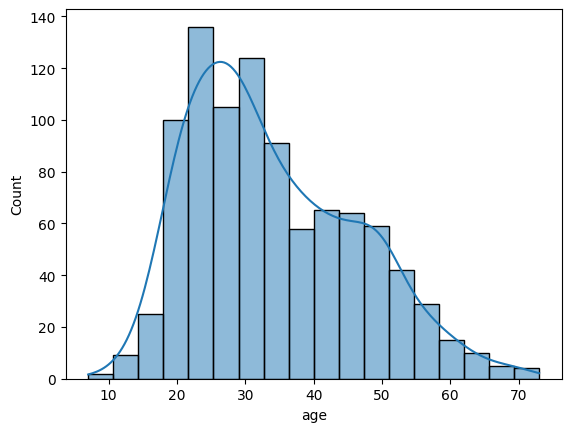

In [ ]:
sns.histplot(data=df_user, x='age', kde=True)

<Axes: xlabel='release_date', ylabel='Count'>

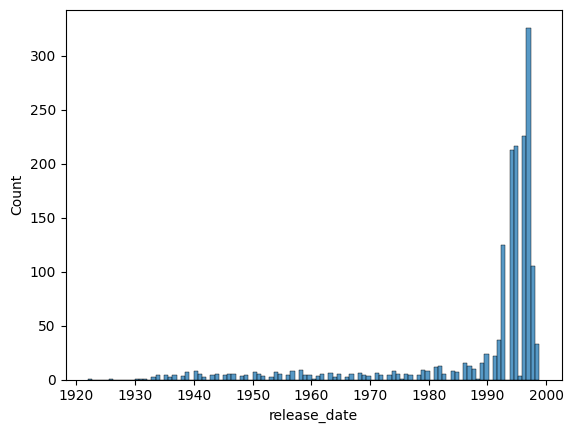

In [ ]:
sns.histplot(data=df_item, x='release_date')

<Axes: xlabel='gender', ylabel='count'>

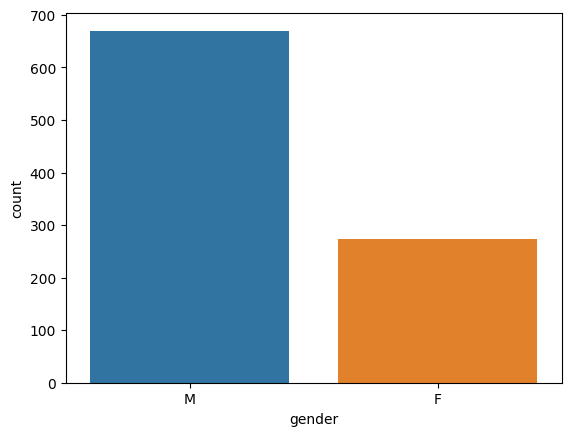

In [ ]:
sns.countplot(data=df_user, x='gender')

<Axes: xlabel='occupation', ylabel='count'>

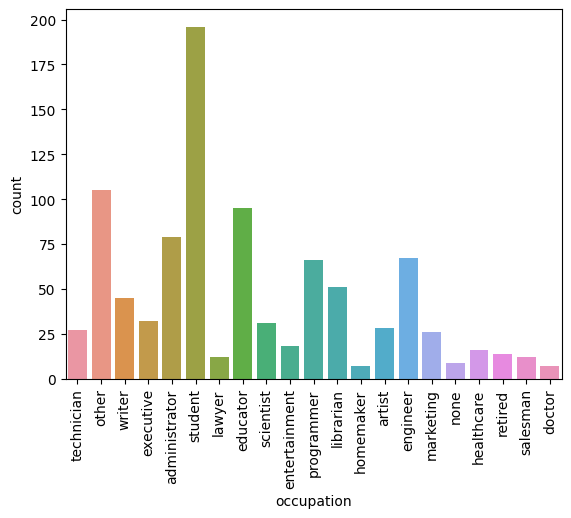

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=df_user, x='occupation')

#Geners over the years (Bivariate)

In [ ]:
df_item['year'] = df_item['release_date'].dt.year
df_genere = df_item.drop(['movie_id','movie_title','release_date'], axis=1)
df_genere

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995.0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1996.0
1660,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1998.0
1661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1998.0
1662,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1994.0


In [ ]:
df_genere = df_genere.groupby(by='year').sum()

In [ ]:
df_genere

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
1922.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994.0,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995.0,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996.0,0,44,23,9,20,108,21,18,169,6,1,11,9,6,38,15,47,9,2


<Axes: xlabel='year'>

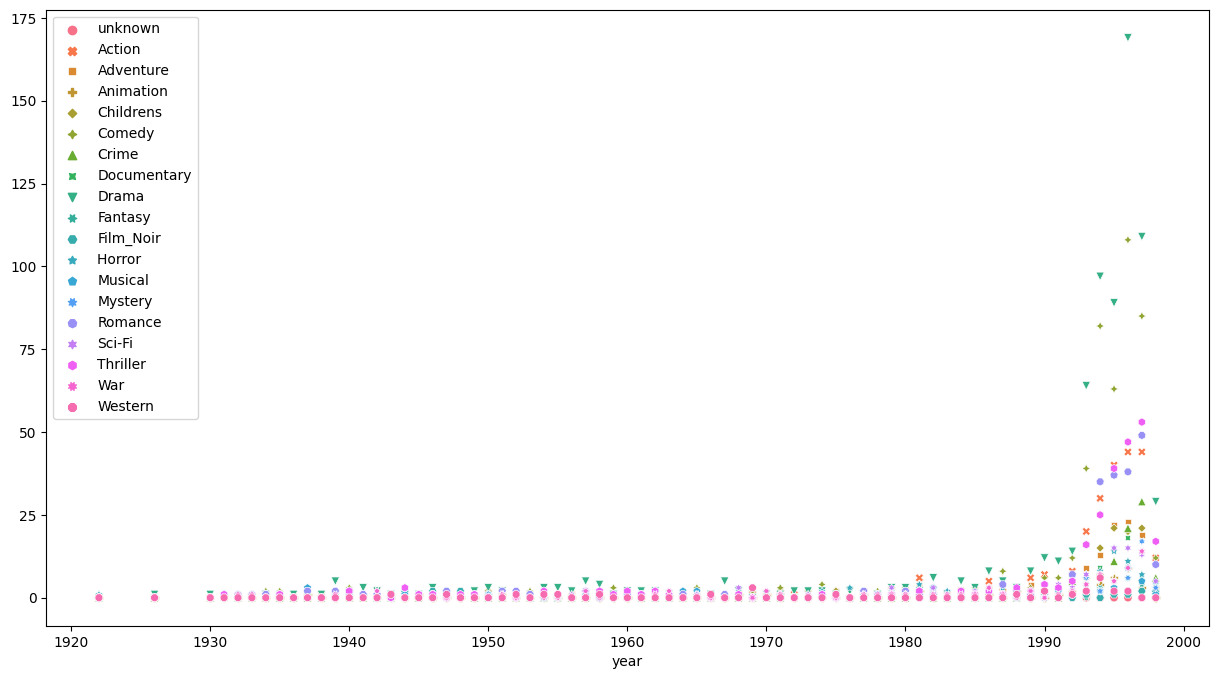

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_genere)

<Axes: xlabel='year'>

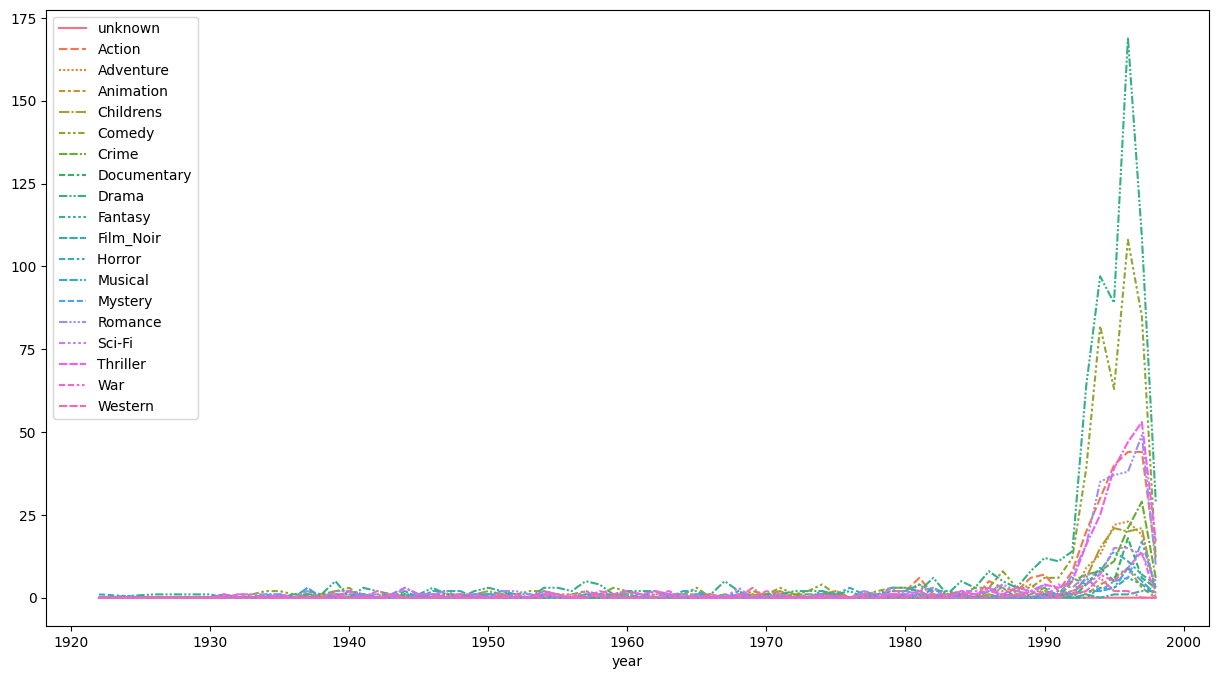

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_genere)

#Top 25 rating

During the session there was a minor mishap here. Instead of "count" we ended up using "sum". Take Note.

In [ ]:
df_rating = df_data.groupby(by='item_id').agg({'user_id':'count', 'rating':'mean'}).rename(columns={'user_id':'review_count','rating':'avg_rating'})
df_rating

,review_count,avg_rating
item_id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326
...,...,...
1678,1,1.000000
1679,1,3.000000
1680,1,2.000000


In [ ]:
df_rating[df_rating['review_count']>100].sort_values(by='avg_rating',ascending=False).head(25)

,review_count,avg_rating
item_id,,
408,112,4.491071
318,298,4.466443
169,118,4.466102
483,243,4.456790
64,283,4.445230
603,209,4.387560
12,267,4.385768
50,583,4.358491
178,125,4.344000


# Gender-wise viewer comparision (Final Ques)

In [ ]:
df_combine = df_data.set_index('item_id').join(df_item.set_index('movie_id'), how='inner')
df_combine = df_combine.set_index('user_id').join(df_user.set_index('user_id'), how='inner')
df_combine = df_combine.reset_index()
df_combine

,user_id,rating,timestamp,movie_title,release_date,unknown,Action,Adventure,Animation,Childrens,...,Romance,Sci-Fi,Thriller,War,Western,year,age,gender,occupation,zip_code
0,1,5,874965758,Toy Story (1995),1995-01-01,0,0,0,1,1,...,0,0,0,0,0,1995.0,24,M,technician,85711
1,1,3,876893171,GoldenEye (1995),1995-01-01,0,1,1,0,0,...,0,0,1,0,0,1995.0,24,M,technician,85711
2,1,4,878542960,Four Rooms (1995),1995-01-01,0,0,0,0,0,...,0,0,1,0,0,1995.0,24,M,technician,85711
3,1,3,876893119,Get Shorty (1995),1995-01-01,0,1,0,0,0,...,0,0,0,0,0,1995.0,24,M,technician,85711
4,1,3,889751712,Copycat (1995),1995-01-01,0,0,0,0,0,...,0,0,1,0,0,1995.0,24,M,technician,85711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99387,943,2,875501756,Bottle Rocket (1996),1996-02-21,0,0,0,0,0,...,0,0,0,0,0,1996.0,22,M,student,77841
99388,943,4,888640250,Reality Bites (1994),1994-01-01,0,0,0,0,0,...,0,0,0,0,0,1994.0,22,M,student,77841
99389,943,3,888640250,Young Guns II (1990),1990-01-01,0,1,0,0,0,...,0,0,0,0,1,1990.0,22,M,student,77841
99390,943,3,888640275,Under Siege 2: Dark Territory (1995),1995-01-01,0,1,0,0,0,...,0,0,0,0,0,1995.0,22,M,student,77841


In [ ]:
df_combine.duplicated().sum()

0

Men watch more drama than women<br>
Men watch more Romance than women<br>
Women watch more Sci-Fi than men<br>

In [ ]:
df_combine = df_combine.groupby(['user_id','gender']).agg({"Drama":"sum","Romance":"sum","Sci-Fi":"sum"}).reset_index()

In [ ]:
df_combine

,user_id,gender,Drama,Romance,Sci-Fi
0,1,M,106,43,43
1,2,F,34,16,4
2,3,M,19,4,8
3,4,M,5,3,6
4,5,F,27,19,33
...,...,...,...,...,...
938,939,F,18,10,8
939,940,M,48,24,19
940,941,M,5,1,8
941,942,F,30,17,6


In [ ]:
df_combine[df_combine['Drama']>0]['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

In [ ]:
df_combine[df_combine['Romance']>0]['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

In [ ]:
df_combine[df_combine['Sci-Fi']>0]['gender'].value_counts()

M    652
F    256
Name: gender, dtype: int64

Of all the 943 users we had. <br>
All of them watch Drama and Romance. Men lead the watch count in both of them. <br>
The Sci-Fi genere is not watched by every user in our dataset. Here to men lead the watch count.